# Lab 3: Bayes Classifier and Boosting

## Jupyter notebooks

In this lab, you can use Jupyter <https://jupyter.org/> to get a nice layout of your code and plots in one document. However, you may also use Python as usual, without Jupyter.

If you have Python and pip, you can install Jupyter with `sudo pip install jupyter`. Otherwise you can follow the instruction on <http://jupyter.readthedocs.org/en/latest/install.html>.

And that is everything you need! Now use a terminal to go into the folder with the provided lab files. Then run `jupyter notebook` to start a session in that folder. Click `lab3.ipynb` in the browser window that appeared to start this very notebook. You should click on the cells in order and either press `ctrl+enter` or `run cell` in the toolbar above to evaluate all the expressions.

Be sure to put `%matplotlib inline` at the top of every code cell where you call plotting functions to get the resulting plots inside the document.

## Import the libraries

In Jupyter, select the cell below and press `ctrl + enter` to import the needed libraries.
Check out `labfuns.py` if you are interested in the details.

In [1]:
import numpy as np
from scipy import misc
from imp import reload
from labfuns import *
import random

import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=UserWarning)

C:\Users\marwi\AppData\Local\Temp\ipykernel_17212\3107638553.py:3: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload


## Bayes classifier functions to implement

The lab descriptions state what each function should do.

In [2]:
# NOTE: you do not need to handle the W argument for this part!
# in: labels - N vector of class labels
# out: prior - C x 1 vector of class priors
def computePrior(labels, W=None):
    Npts = labels.shape[0]
    if W is None:
        W = np.ones((Npts,1))/Npts
    else:
        assert(W.shape[0] == Npts)
    classes = np.unique(labels)
    Nclasses = np.size(classes)

    prior = np.zeros((Nclasses,1))

    # TODO: compute the values of prior for each class!
    # ==========================
    for c in classes:
        prior[c] = np.sum(W[labels==c]) / np.sum(W)

    # ==========================

    return prior

# NOTE: you do not need to handle the W argument for this part!
# in:      X - N x d matrix of N data points
#     labels - N vector of class labels
# out:    mu - C x d matrix of class means (mu[i] - class i mean)
#      sigma - C x d x d matrix of class covariances (sigma[i] - class i sigma)
def mlParams(X, labels, W=None):
    assert(X.shape[0]==labels.shape[0])
    Npts,Ndims = np.shape(X)
    classes = np.unique(labels)
    Nclasses = np.size(classes)

    if W is None:
        W = np.ones((Npts,1))/float(Npts)

    mu = np.zeros((Nclasses,Ndims))
    sigma = np.zeros((Nclasses,Ndims,Ndims))
            
    # TODO: fill in the code to compute mu and sigma!
    # ==========================
    for c in classes:
        Nk = sum(labels==c)
        Xc = X[labels==c]
        Wc = W[labels==c]
        mu[c] = Wc.T @ Xc / np.sum(Wc)
        for m in range(Ndims):
            sigma[c, m, m] = sum([Wc[i] * (Xc[i, m] - mu[c, m])**2 for i in range(Nk)]) / sum(Wc)
    # ==========================
            
    return mu, sigma

# in:      X - N x d matrix of M data points
#      prior - C x 1 matrix of class priors
#         mu - C x d matrix of class means (mu[i] - class i mean)
#      sigma - C x d x d matrix of class covariances (sigma[i] - class i sigma)
# out:     h - N vector of class predictions for test points
def classifyBayes(X, prior, mu, sigma):

    Npts = X.shape[0]
    Nclasses, Ndims = np.shape(mu)
    logProb = np.zeros((Nclasses, Npts))

    # TODO: fill in the code to compute the log posterior logProb!
    # ==========================
    for c in range(Nclasses):
        diag = np.diag(sigma[c])    # inv(diagonal matrix) = diagonal matrix with 1/diagonal elements
        inv = np.diag(1. / diag)    
        det = np.prod(diag)         # det(diagonal matrix) = product of diagonal elements
        for i in range(Npts):
            diff = X[i] - mu[c]
            logProb[c, i] = -0.5 * np.log(det) - 0.5 * np.dot(np.dot(diff, inv), diff) + np.log(prior[c])
    # ==========================
    
    # one possible way of finding max a-posteriori once
    # you have computed the log posterior
    h = np.argmax(logProb, axis=0)
    return h

The implemented functions can now be summarized into the `BayesClassifier` class, which we will use later to test the classifier, no need to add anything else here:

In [3]:
# NOTE: no need to touch this
class BayesClassifier(object):
    def __init__(self):
        self.trained = False

    def trainClassifier(self, X, labels, W=None):
        rtn = BayesClassifier()
        rtn.prior = computePrior(labels, W)
        rtn.mu, rtn.sigma = mlParams(X, labels, W)
        rtn.trained = True
        return rtn

    def classify(self, X):
        return classifyBayes(X, self.prior, self.mu, self.sigma)

## Test the Maximum Likelihood estimates

Call `genBlobs` and `plotGaussian` to verify your estimates.

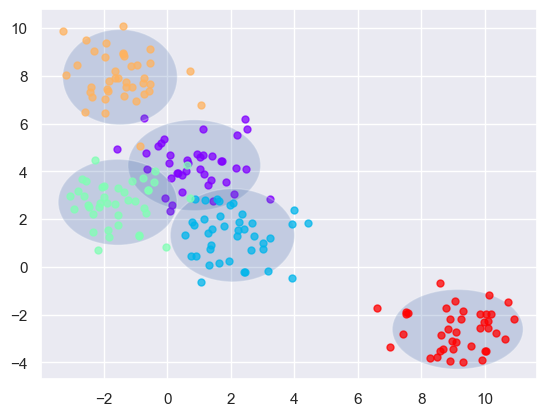

In [4]:
%matplotlib inline

X, labels = genBlobs(centers=5)
mu, sigma = mlParams(X, labels)
plotGaussian(X,labels,mu,sigma)

Call the `testClassifier` and `plotBoundary` functions for this part.

In [5]:
testClassifier(BayesClassifier(), dataset='iris', split=0.7)

Trial: 0 Accuracy 84.4
Trial: 10 Accuracy 95.6
Trial: 20 Accuracy 93.3
Trial: 30 Accuracy 86.7
Trial: 40 Accuracy 88.9
Trial: 50 Accuracy 91.1
Trial: 60 Accuracy 86.7
Trial: 70 Accuracy 91.1
Trial: 80 Accuracy 86.7
Trial: 90 Accuracy 91.1
Final mean classification accuracy  89 with standard deviation 4.16


In [6]:
testClassifier(BayesClassifier(), dataset='vowel', split=0.7)

Trial: 0 Accuracy 61
Trial: 10 Accuracy 66.2
Trial: 20 Accuracy 74
Trial: 30 Accuracy 66.9
Trial: 40 Accuracy 59.7
Trial: 50 Accuracy 64.3
Trial: 60 Accuracy 66.9
Trial: 70 Accuracy 63.6
Trial: 80 Accuracy 62.3
Trial: 90 Accuracy 70.8
Final mean classification accuracy  64.7 with standard deviation 4.03


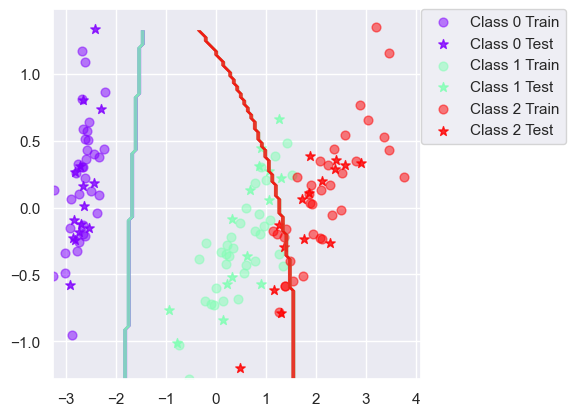

In [7]:
%matplotlib inline
plotBoundary(BayesClassifier(), dataset='iris',split=0.7)

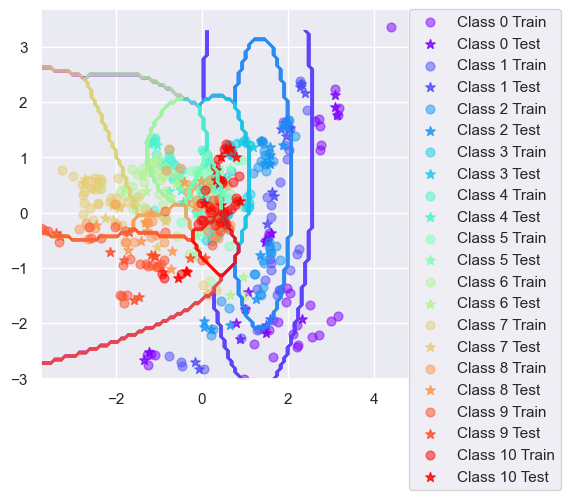

In [8]:
%matplotlib inline
plotBoundary(BayesClassifier(), dataset='vowel',split=0.7)

### Assignment 3 questions

(1) In practice it is rare that features are completely independent. So, assuming that features are independent is a way for us to make simplifications in order to reduce a problems complexity. For example, when classifying a song by genre, we can look at features as duration, key, loudness, tempo,etc. Anecdotally, high-tempo-songs tend to be louder and in somewhat higher keys, but this also not the case for many songs, since songs that are in higher keys might not be high tempo etc. So, generally it is not reasonable (or feasable) to take into account all intricisies of features of a song to be able to make reasonable classifications.

So assuming feature independence is reasonable in high-dimensional data and when there is no clear reason to think otherwise, and it might not be reasonable if there is some indication of features being clearly dependent of eachother.

(2) There are two decision boundaries in the plot of the Iris dataset. The decision boundary on the left hand side is clearly dividing class 0 from the rest of the classes, but the decision boundary on the right hand side looks like it is skewed in the wrong direction and shound instead lean to the right side. One could probably improve the classification results for this scenario by using either SVM with a linear kernel (or low order kernel) and allowing for some slack since it seems like class 1 and 2 are almost linearly separable.

## Boosting functions to implement

The lab descriptions state what each function should do.

In [9]:
# in: base_classifier - a classifier of the type that we will boost, e.g. BayesClassifier
#                   X - N x d matrix of N data points
#              labels - N vector of class labels
#                   T - number of boosting iterations
# out:    classifiers - (maximum) length T Python list of trained classifiers
#              alphas - (maximum) length T Python list of vote weights
def trainBoost(base_classifier, X, labels, T=10):
    # these will come in handy later on
    Npts, Ndims = np.shape(X)

    classifiers = [] # append new classifiers to this list
    alphas = [] # append the vote weight of the classifiers to this list

    # The weights for the first iteration
    wCur = np.ones((Npts,1))/float(Npts)

    for _ in range(0, T):

        # step (1) - train a new classifier
        # a new classifier can be trained like this, given the current weights
        classifiers.append(base_classifier.trainClassifier(X, labels, wCur))

        # step (2) - compute the error of classifier wrt data
        # do classification for each point
        vote = classifiers[-1].classify(X)

        # TODO: Fill in the rest, construct the alphas etc.
        # ==========================
        delta_true = (vote == labels)
        delta_false = (vote != labels)

        error = wCur.T @ (1 - delta_true)
        alpha = 0.5 * np.log((1 - error) / error)
        
        wCur[delta_true] *= np.exp(-alpha)
        wCur[delta_false] *= np.exp(alpha)
        wCur /= np.sum(wCur)
        
        alphas.append(alpha) # you will need to append the new alpha
        # ==========================
    
    return classifiers, alphas

# in:       X - N x d matrix of N data points
# classifiers - (maximum) length T Python list of trained classifiers as above
#      alphas - (maximum) length T Python list of vote weights
#    Nclasses - the number of different classes
# out:  yPred - N vector of class predictions for test points
def classifyBoost(X, classifiers, alphas, Nclasses):
    Npts = X.shape[0]
    Ncomps = len(classifiers)

    # if we only have one classifier, we may just classify directly
    if Ncomps == 1:
        return classifiers[0].classify(X)
    else:
        votes = np.zeros((Npts,Nclasses))

        # TODO: implement classificiation when we have trained several classifiers!
        # here we can do it by filling in the votes vector with weighted votes
        # ==========================
        
        for t in range(Ncomps):
            vote = classifiers[t].classify(X)
            for x in range(Npts):
                votes[x, vote[x]] += alphas[t]

        # ==========================

        # one way to compute yPred after accumulating the votes
        return np.argmax(votes,axis=1)

The implemented functions can now be summarized another classifer, the `BoostClassifier` class. This class enables boosting different types of classifiers by initializing it with the `base_classifier` argument. No need to add anything here.

In [10]:
# NOTE: no need to touch this
class BoostClassifier(object):
    def __init__(self, base_classifier, T=10):
        self.base_classifier = base_classifier
        self.T = T
        self.trained = False

    def trainClassifier(self, X, labels):
        rtn = BoostClassifier(self.base_classifier, self.T)
        rtn.nbr_classes = np.size(np.unique(labels))
        rtn.classifiers, rtn.alphas = trainBoost(self.base_classifier, X, labels, self.T)
        rtn.trained = True
        return rtn

    def classify(self, X):
        return classifyBoost(X, self.classifiers, self.alphas, self.nbr_classes)

## Run some experiments

Call the `testClassifier` and `plotBoundary` functions for this part.

In [11]:
testClassifier(BoostClassifier(BayesClassifier(), T=10), dataset='iris',split=0.7)

Trial: 0 Accuracy 95.6
Trial: 10 Accuracy 100
Trial: 20 Accuracy 93.3
Trial: 30 Accuracy 91.1
Trial: 40 Accuracy 97.8
Trial: 50 Accuracy 93.3
Trial: 60 Accuracy 93.3
Trial: 70 Accuracy 97.8
Trial: 80 Accuracy 95.6
Trial: 90 Accuracy 93.3
Final mean classification accuracy  94.1 with standard deviation 6.72


In [12]:
testClassifier(BoostClassifier(BayesClassifier(), T=10), dataset='vowel',split=0.7)

Trial: 0 Accuracy 76.6
Trial: 10 Accuracy 86.4
Trial: 20 Accuracy 83.1
Trial: 30 Accuracy 80.5
Trial: 40 Accuracy 72.7
Trial: 50 Accuracy 76
Trial: 60 Accuracy 81.8
Trial: 70 Accuracy 82.5
Trial: 80 Accuracy 79.9
Trial: 90 Accuracy 83.1
Final mean classification accuracy  80.2 with standard deviation 3.52


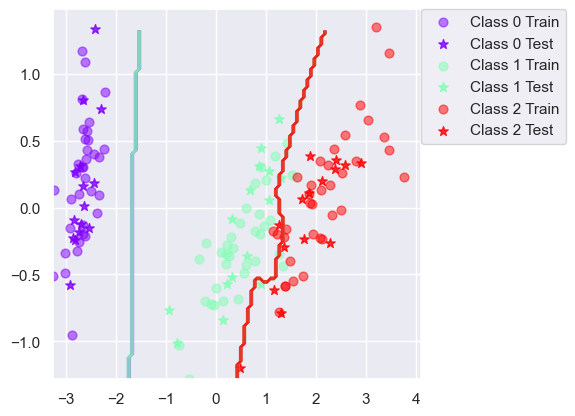

In [13]:
%matplotlib inline
plotBoundary(BoostClassifier(BayesClassifier()), dataset='iris',split=0.7)

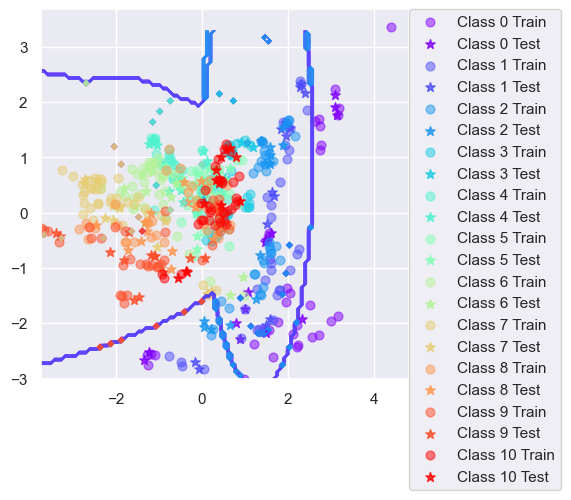

In [14]:
%matplotlib inline
plotBoundary(BoostClassifier(BayesClassifier()), dataset='vowel',split=0.7)

(1) As expected, there is an improvement in classification accuracy:

Iris: mean accuracy 89 with standard deviation 4.16 --> mean accuracy 94.1 with standard deviation 6.72

Vowel: mean accuracy 64.7 with standard deviation 4.03 --> mean accuracy 80.2 with standard deviation 3.52

We see a clear increase in classification accuracy in both datasets after implementing boosting. Boosting allows us to reduce the weight on correctly classified datapoints and increase the weight of wrongly classified datapoints, so that the next iteration of the algorithm focuses more on the incorrectly classified ones. This modifies the relative influence that the individual datapoints have on the decision boundary, more often than not making the decision boundary more representative of the data.

(2) The green decision boundary is almost less complex as it appears to be more straight than the previous iteration using Naive Bayes (NB). The red decision boundary, while not leaning to the left like in NB, it is noticeably more representative of the data making it more complex. 

On another note, we have also seen that the standard deviation increases somewhat after boosting the NB classifier. This is indicative that the boosted model is fitting to the training data more closely, since it might become more sensitive to test data, which goes in hand with what we are able to observe in the plot.

(3) The answer is yes, we can make up for not using a more advanced model by using boosting. But in this case of a naive bayes classifier is that we are still making the assumption that the data feateres are independent.

Now repeat the steps with a decision tree classifier.

In [15]:
testClassifier(DecisionTreeClassifier(), dataset='iris', split=0.7)

Trial: 0 Accuracy 95.6
Trial: 10 Accuracy 100
Trial: 20 Accuracy 91.1
Trial: 30 Accuracy 91.1
Trial: 40 Accuracy 93.3
Trial: 50 Accuracy 91.1
Trial: 60 Accuracy 88.9
Trial: 70 Accuracy 88.9
Trial: 80 Accuracy 93.3
Trial: 90 Accuracy 88.9
Final mean classification accuracy  92.4 with standard deviation 3.71


In [16]:
testClassifier(BoostClassifier(DecisionTreeClassifier(), T=10), dataset='iris',split=0.7)

Trial: 0 Accuracy 95.6
Trial: 10 Accuracy 100
Trial: 20 Accuracy 95.6
Trial: 30 Accuracy 93.3
Trial: 40 Accuracy 93.3
Trial: 50 Accuracy 95.6
Trial: 60 Accuracy 88.9
Trial: 70 Accuracy 93.3
Trial: 80 Accuracy 93.3
Trial: 90 Accuracy 93.3
Final mean classification accuracy  94.6 with standard deviation 3.65


In [17]:
testClassifier(DecisionTreeClassifier(), dataset='vowel',split=0.7)

Trial: 0 Accuracy 63.6
Trial: 10 Accuracy 68.8
Trial: 20 Accuracy 63.6
Trial: 30 Accuracy 66.9
Trial: 40 Accuracy 59.7
Trial: 50 Accuracy 63
Trial: 60 Accuracy 59.7
Trial: 70 Accuracy 68.8
Trial: 80 Accuracy 59.7
Trial: 90 Accuracy 68.2
Final mean classification accuracy  64.1 with standard deviation 4


In [18]:
testClassifier(BoostClassifier(DecisionTreeClassifier(), T=10), dataset='vowel',split=0.7)

Trial: 0 Accuracy 85.7
Trial: 10 Accuracy 90.3
Trial: 20 Accuracy 87.7
Trial: 30 Accuracy 90.9
Trial: 40 Accuracy 84.4
Trial: 50 Accuracy 81.2
Trial: 60 Accuracy 88.3
Trial: 70 Accuracy 85.7
Trial: 80 Accuracy 85.7
Trial: 90 Accuracy 87
Final mean classification accuracy  86.6 with standard deviation 2.95


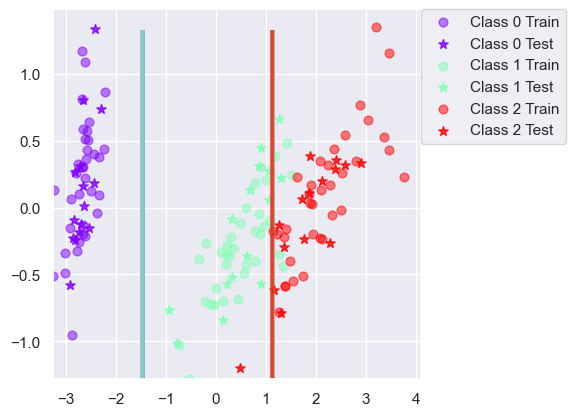

In [19]:
%matplotlib inline
plotBoundary(DecisionTreeClassifier(), dataset='iris',split=0.7)

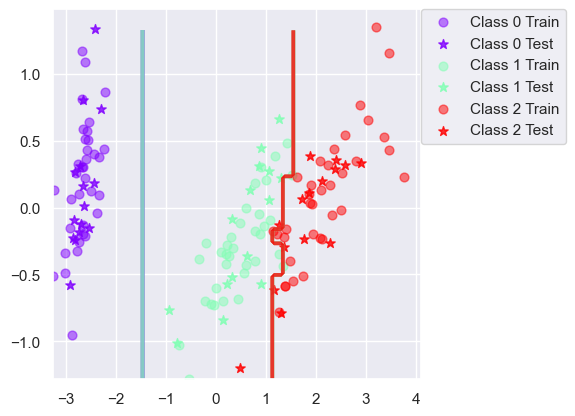

In [20]:
%matplotlib inline
plotBoundary(BoostClassifier(DecisionTreeClassifier(), T=10), dataset='iris',split=0.7)

(1) No not really, there does not seem to be much of an improvement. I looks like the accuracy is around the same for both classifiers. In this case i think that since the data is somewhat already easily classifiable by the decision tree classifier there is not much of an improvement.

(2) Yes the boosted decision boundary is more complex, and hugs the data more tightliy and follows the data closer. On the other hand the greed boundary condition is still the same, indicating that boosting on linearly seperable data is meaningless and only computer intensive. For the red boundary the classifier has to ask more questions to determine what color an observation is.

(3) Since decision trees ar non-parametric as they do not make any assumptions on the distribution of data, it has a much easier time to classify the non-linear/ collinear portion of the data and is more adaptable, as in comparison to Naive Bayes

- outliers:
In terms of outliers i would say that the naive bayes is the worst, since it assumes that the featers are normally distributed and might put poo much weight on the outliers. On the other hand the boosted versions might tend to the outlier points more than desired and, since boosting adds complexity to the models.

 - irrelevant inputs:
 A bayes classifier would in this case have a harder time to make classifications because of its assumptions on the normality of the features. Its performance can also worsen with increasing inputs. Decision trees are better at handling irrelevant input since it does not make any assumptions on the inputs distribution and can ignore irrelevant input as splits that do not contribute. I would argue that boosted trees are better because they can assign smaller weights to irrelevant inputs and larger to relevant inputs.

 - predicative power
 I would say that if all assumptions hold for both methods then they are pretty similar in predicative power. but this is not always the case. hence i would argue that boosted variants of the classifiers have stronger predicative power.

 - mixed type of data
NB does not handle mixed types of data super well and needs different types if normally distribted data, being a parametric method. Desicion trees are on the other hand non parametric and can handle mixed data very well.

- scalability
I would say that bayes scale good with more data instances since it increases its predicative power with more data. Decision trees are also good, but if the data becomes too much i can imagine that the questions it hase to pose might increase as well, but this might have to do with the dimensionality of the data more than the number of instances.




## Bonus: Visualize faces classified using boosted decision trees

Note that this part of the assignment is completely voluntary! First, let's check how a boosted decision tree classifier performs on the olivetti data. Note that we need to reduce the dimension a bit using PCA, as the original dimension of the image vectors is `64 x 64 = 4096` elements.

In [21]:
testClassifier(BayesClassifier(), dataset='olivetti',split=0.7, dim=20)

Trial: 0 Accuracy 88.3
Trial: 10 Accuracy 90.8
Trial: 20 Accuracy 85
Trial: 30 Accuracy 89.2
Trial: 40 Accuracy 89.2
Trial: 50 Accuracy 84.2
Trial: 60 Accuracy 91.7
Trial: 70 Accuracy 82.5
Trial: 80 Accuracy 81.7
Trial: 90 Accuracy 86.7
Final mean classification accuracy  87.7 with standard deviation 3.03


In [22]:
testClassifier(BoostClassifier(DecisionTreeClassifier(), T=10), dataset='olivetti',split=0.7, dim=20)

Trial: 0 Accuracy 80
Trial: 10 Accuracy 74.2
Trial: 20 Accuracy 73.3
Trial: 30 Accuracy 68.3
Trial: 40 Accuracy 74.2
Trial: 50 Accuracy 65
Trial: 60 Accuracy 75.8
Trial: 70 Accuracy 73.3
Trial: 80 Accuracy 69.2
Trial: 90 Accuracy 71.7
Final mean classification accuracy  71.1 with standard deviation 6.55


You should get an accuracy around 70%. If you wish, you can compare this with using pure decision trees or a boosted bayes classifier. Not too bad, now let's try and classify a face as belonging to one of 40 persons!

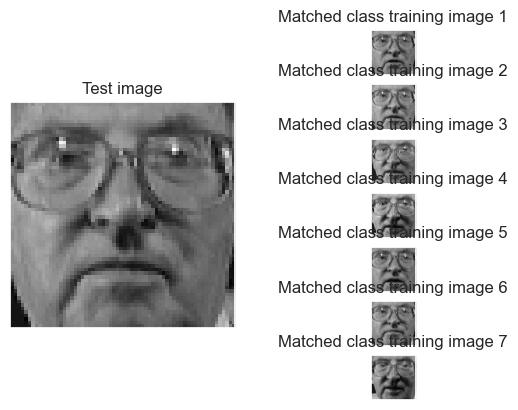

In [32]:
%matplotlib inline
X,y,pcadim = fetchDataset('olivetti') # fetch the olivetti data
xTr,yTr,xTe,yTe,trIdx,teIdx = trteSplitEven(X,y,0.7) # split into training and testing
pca = decomposition.PCA(n_components=20) # use PCA to reduce the dimension to 20
pca.fit(xTr) # use training data to fit the transform
xTrpca = pca.transform(xTr) # apply on training data
xTepca = pca.transform(xTe) # apply on test data
# use our pre-defined decision tree classifier together with the implemented
# boosting to classify data points in the training data
classifier = BoostClassifier(DecisionTreeClassifier(), T=10).trainClassifier(xTrpca, yTr)
yPr = classifier.classify(xTepca)
# choose a test point to visualize
testind = random.randint(0, xTe.shape[0]-1)
# visualize the test point together with the training points used to train
# the class that the test point was classified to belong to
visualizeOlivettiVectors(xTr[yTr == yPr[testind],:], xTe[testind,:])